In [3]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Google Mobility Data From King County

In [4]:
king_county_2020 = pd.read_csv('2020_US_Region_Mobility_Report.csv')
king_county_2020 = king_county_2020[(king_county_2020.sub_region_1 == 'Washington') & (king_county_2020.sub_region_2 == 'King County')]

king_county_2021 = pd.read_csv('2021_US_Region_Mobility_Report.csv')
king_county_2021 = king_county_2021[(king_county_2021.sub_region_1 == 'Washington') & (king_county_2021.sub_region_2 == 'King County')]

king_county_2022 = pd.read_csv('2022_US_Region_Mobility_Report.csv')
king_county_2022 = king_county_2022[(king_county_2022.sub_region_1 == 'Washington') & (king_county_2022.sub_region_2 == 'King County')]

In [5]:
king_df = pd.concat([king_county_2020,king_county_2021,king_county_2022]).iloc[:, 8:15]

In [6]:
days = []
for i in range(len(king_df)):
    if i % 7 == 0:
        days.append("Saturday")
    elif i % 7 == 1:
        days.append("Sunday")
    elif i % 7 == 2:
        days.append("Monday")
    elif i % 7 == 3:
        days.append("Tuesday")
    elif i % 7 == 4:
        days.append("Wednesday")
    elif i % 7 == 5:
        days.append("Thursday")
    elif i % 7 == 6:
        days.append("Friday")
king_df["Day"] = days

In [7]:
king_df 

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Day
765150,2020-02-15,-1.0,-2.0,11.0,8.0,-3.0,0.0,Saturday
765151,2020-02-16,13.0,1.0,19.0,3.0,-2.0,-1.0,Sunday
765152,2020-02-17,10.0,4.0,64.0,-13.0,-40.0,7.0,Monday
765153,2020-02-18,4.0,2.0,51.0,6.0,-8.0,1.0,Tuesday
765154,2020-02-19,2.0,2.0,62.0,6.0,-7.0,0.0,Wednesday
...,...,...,...,...,...,...,...,...
704845,2022-10-11,-18.0,-10.0,24.0,-29.0,-40.0,9.0,Tuesday
704846,2022-10-12,-19.0,-10.0,23.0,-33.0,-41.0,9.0,Wednesday
704847,2022-10-13,-21.0,-10.0,10.0,-30.0,-41.0,9.0,Thursday
704848,2022-10-14,-18.0,-9.0,16.0,-29.0,-44.0,9.0,Friday


# US Energy Information Administration Fuel Prices for King County

In [8]:
fuel_prices = pd.read_csv('washington_gas_prices_2020-2022.csv')
fuel_prices = fuel_prices.loc[::-1].reset_index(drop=True)
fuel_prices

,Date,Price Per Gallon
0,"Nov 21, 2022",4.822
1,"Nov 14, 2022",4.901
2,"Nov 07, 2022",4.879
3,"Oct 31, 2022",4.934
4,"Oct 24, 2022",5.049
...,...,...
146,"Feb 03, 2020",3.108
147,"Jan 27, 2020",3.107
148,"Jan 20, 2020",3.142
149,"Jan 13, 2020",3.134


In [9]:
for index,date in enumerate(fuel_prices['Date']):
    fuel_prices['Date'][index] = datetime.strptime(date,"%b %d, %Y")
    
for index,date in enumerate(fuel_prices['Date']):
    fuel_prices['Date'][index] = date.strftime("%Y-%m-%d")
    
fuel_prices = fuel_prices.rename(columns={'Date':'date'})

/var/folders/z3/nzdjs9l52974wlrgl05jpcjc0000gn/T/ipykernel_28985/2484401540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_prices['Date'][index] = datetime.strptime(date,"%b %d, %Y")
/var/folders/z3/nzdjs9l52974wlrgl05jpcjc0000gn/T/ipykernel_28985/2484401540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_prices['Date'][index] = date.strftime("%Y-%m-%d")


In [10]:
fuel_prices

,date,Price Per Gallon
0,2022-11-21,4.822
1,2022-11-14,4.901
2,2022-11-07,4.879
3,2022-10-31,4.934
4,2022-10-24,5.049
...,...,...
146,2020-02-03,3.108
147,2020-01-27,3.107
148,2020-01-20,3.142
149,2020-01-13,3.134


In [11]:
combined = king_df.merge(fuel_prices,how='left',on='date')
combined[['Price Per Gallon']] = combined[['Price Per Gallon']].fillna(method='bfill')
combined['date'] = pd.to_datetime(combined['date'])
combined.sort_values(by='date')


,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Day,Price Per Gallon
0,2020-02-15,-1.0,-2.0,11.0,8.0,-3.0,0.0,Saturday,3.125
1,2020-02-16,13.0,1.0,19.0,3.0,-2.0,-1.0,Sunday,3.125
2,2020-02-17,10.0,4.0,64.0,-13.0,-40.0,7.0,Monday,3.125
3,2020-02-18,4.0,2.0,51.0,6.0,-8.0,1.0,Tuesday,3.116
4,2020-02-19,2.0,2.0,62.0,6.0,-7.0,0.0,Wednesday,3.116
...,...,...,...,...,...,...,...,...,...
969,2022-10-11,-18.0,-10.0,24.0,-29.0,-40.0,9.0,Tuesday,NaN
970,2022-10-12,-19.0,-10.0,23.0,-33.0,-41.0,9.0,Wednesday,NaN
971,2022-10-13,-21.0,-10.0,10.0,-30.0,-41.0,9.0,Thursday,NaN
972,2022-10-14,-18.0,-9.0,16.0,-29.0,-44.0,9.0,Friday,NaN


In [12]:
from pathlib import Path
def export_to_csv(df,name):
    filepath = Path(name+'.csv')  
    filepath.parent.mkdir(parents=True, exist_ok=True)  
    df.to_csv(filepath)
export_to_csv(combined,'merged_data')

# VIZ 1

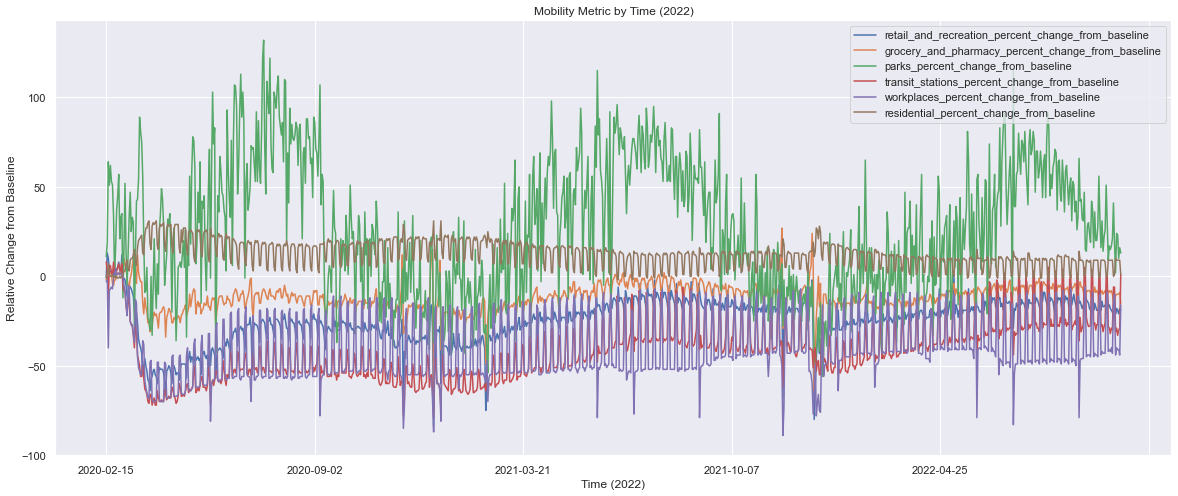

In [58]:
king_df.plot(x="date", 
             y=[
                 "retail_and_recreation_percent_change_from_baseline", 
                 "grocery_and_pharmacy_percent_change_from_baseline", 
                 "parks_percent_change_from_baseline", 
                 "transit_stations_percent_change_from_baseline",
                 "workplaces_percent_change_from_baseline",
                 "residential_percent_change_from_baseline"
             ],
             figsize = (20, 8))
plt.title("Mobility Metric by Time (2022)")
plt.xlabel("Time (2022)")
plt.ylabel("Relative Change from Baseline");

<AxesSubplot:xlabel='date'>

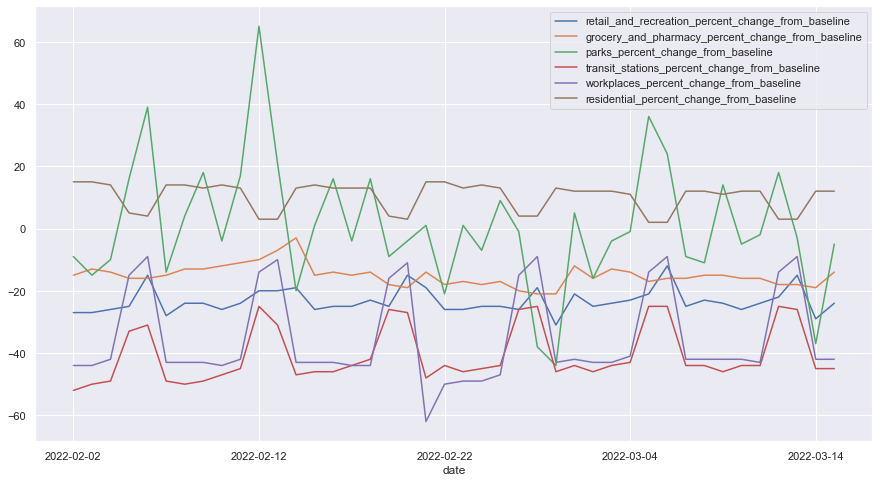

In [66]:
king_df[718:760].plot(x="date", 
             y=[
                 "retail_and_recreation_percent_change_from_baseline", 
                 "grocery_and_pharmacy_percent_change_from_baseline", 
                 "parks_percent_change_from_baseline", 
                 "transit_stations_percent_change_from_baseline",
                 "workplaces_percent_change_from_baseline",
                 "residential_percent_change_from_baseline"
             ],
             figsize = (15, 8))


# VIZ 2

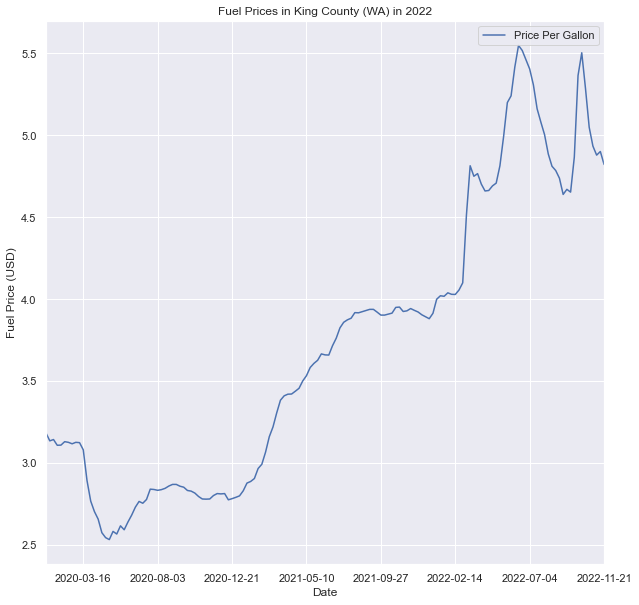

In [51]:
fuel_prices.plot(x="date", y='Price Per Gallon',figsize = (10,10))
plt.title("Fuel Prices in King County (WA) in 2022")
plt.xlim(fuel_prices.index[-1],fuel_prices.index[0])
plt.xlabel("Date")
plt.ylabel("Fuel Price (USD)");


# VIZ 3


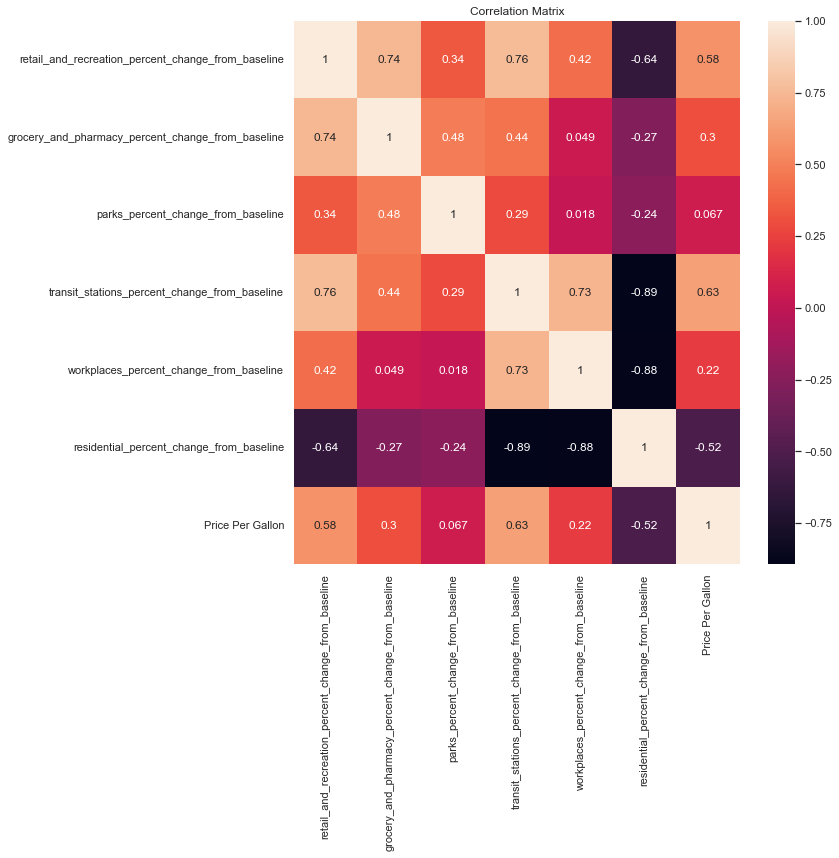

In [53]:
sns.set(rc={"figure.figsize":(10, 10)})
dataplot = sns.heatmap(combined.corr(),annot=True).set_title('Correlation Matrix')

# VIZ 4

Text(0.5, 1.0, 'Residential')

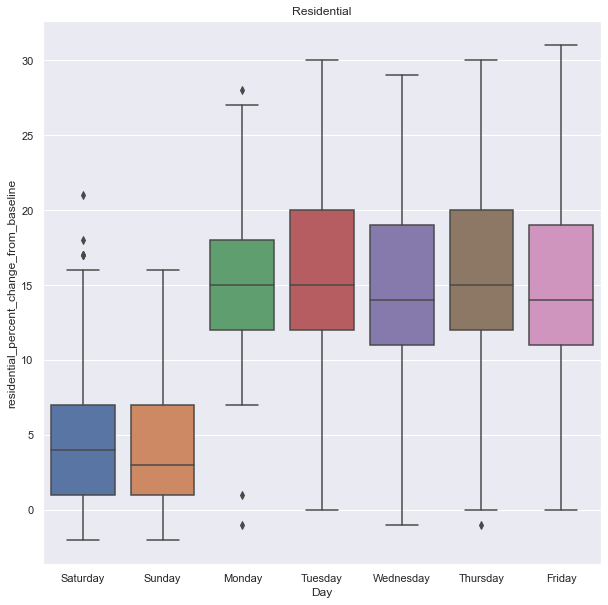

In [43]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.boxplot(x ='Day', y ='residential_percent_change_from_baseline', data = king_df).set_title('Residential')


Text(0.5, 1.0, 'WERK')

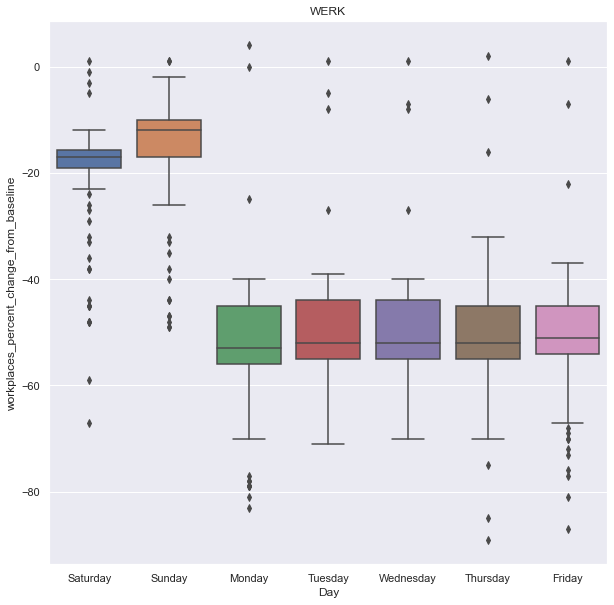

In [44]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.boxplot(x ='Day', y ='workplaces_percent_change_from_baseline', data = king_df).set_title('WERK')

ValueError: Could not interpret input 'Month'